### Loading the data

In [5]:
# Make plots appear inline rather than in a separate window
# no-import-all prevents importing * from numpy and matplotlib
%pylab inline --no-import-all

# Import some useful libraries
import scipy
import numpy
import pandas
import seaborn # Importing seaborn automatically makes our plots look better
import matplotlib.pyplot as pyplt

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pandas.read_csv("candy_choices.csv")
df.head()

,gender,candy,flavor,age,ethnicity,shirt color
0,M,reeses,NaN,26.0,white,red
1,M,kitkat,NaN,32.0,black,green
2,F,airhead,double mystery,26.0,mixed,white
3,M,starburst,red,26.0,white,red
4,F,reeses,NaN,31.0,white,black


In [7]:
# Each event will contain a tuple (selection index, selection, time since previous selection)
event_list = [] 

i = 0
time_since_last = {} 

for item in df["candy"].values:
    if item in time_since_last:
        event_list.append((i, item, time_since_last[item]))
    
    for e in time_since_last.keys():
        time_since_last[e]+=1
            
    time_since_last[item] = 0
    i += 1

In [8]:
event_list[:10]

[(4, 'reeses', 3),
 (5, 'starburst', 1),
 (7, 'airhead', 4),
 (8, 'starburst', 2),
 (9, 'reeses', 4),
 (11, 'kitkat', 9),
 (12, 'airhead', 4),
 (13, 'kitkat', 1),
 (14, 'kitkat', 0),
 (15, 'kitkat', 0)]

### Plots of interselection times

In [9]:
def plot_interselection_time(events, color, candy_name):
    # Pull out the interselection times for the appropriate candy
    candy = [] 
    for (i, choice, time) in events:
        if choice == candy_name:
            candy.append(time)
            
    # Plot the interselection times
    plt.plot(range(len(candy)), candy, color=color, label=candy_name)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)

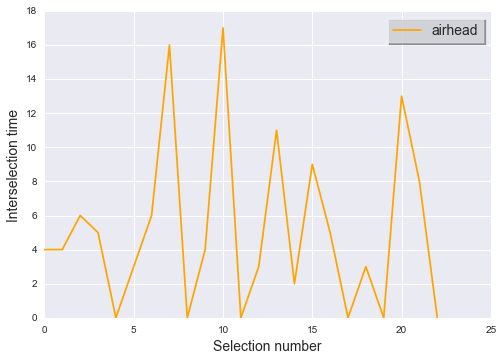

In [10]:
plot_interselection_time(event_list, "orange", "airhead")

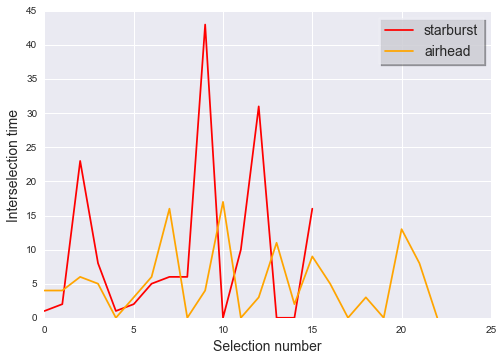

In [11]:
plot_interselection_time(event_list, "red", "starburst")
plot_interselection_time(event_list, "orange", "airhead")

In [12]:
########################################
#                   3                  #
########################################

# Modify this function so that a 5 on the x-axis corresponds to
# the 5th time any candy was chosen

def plot_interselection_time_scaled(events, color, candy_name):
    # Pull out the interselection times for the appropriate candy
    candy = [] 
    selection_numbers = []
    for (i, choice, time) in events:
        if choice == candy_name:
            candy.append(time)
            selection_numbers.append(i)
    # Plot the interselection times
    plt.plot(selection_numbers, candy, color=color, label=candy_name)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)

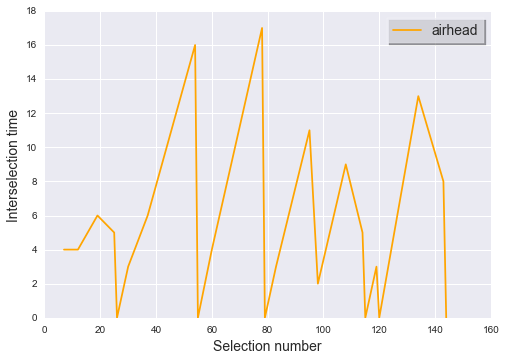

In [13]:
plot_interselection_time_scaled(event_list, "orange", "airhead")

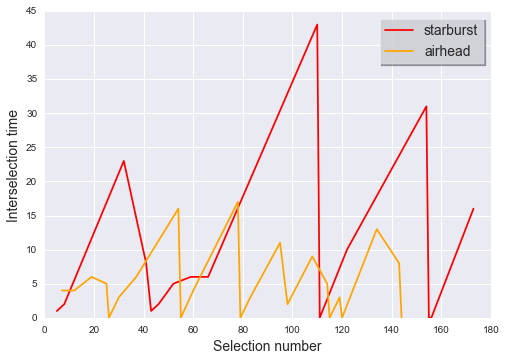

In [14]:
plot_interselection_time_scaled(event_list, "red", "starburst")
plot_interselection_time_scaled(event_list, "orange", "airhead")

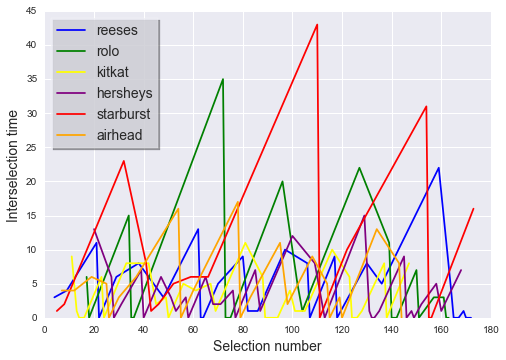

In [15]:
plot_interselection_time_scaled(event_list, "blue", "reeses")
plot_interselection_time_scaled(event_list, "green", "rolo")
plot_interselection_time_scaled(event_list, "yellow", "kitkat")
plot_interselection_time_scaled(event_list, "purple", "hersheys")
plot_interselection_time_scaled(event_list, "red", "starburst")
plot_interselection_time_scaled(event_list, "orange", "airhead")

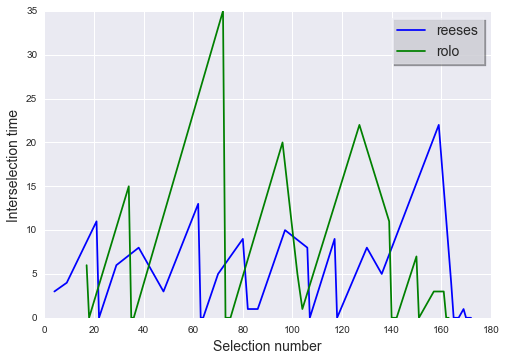

In [16]:
plot_interselection_time_scaled(event_list, "blue", "reeses")
plot_interselection_time_scaled(event_list, "green", "rolo")

### Build training points

In [17]:
# Each sharedStateEvent will be a map from all candy types to the time since that candy was selected
shared_state_events = [{"airhead":0, "starburst":0, "hersheys":0, "reeses":0, "kitkat":0, "rolo":0}]


import copy

i = 0
time_since_last = {}
for item in df["candy"].values:
    if not item in time_since_last:
        time_since_last[item] = 0
    
    event_list.append((i, item, time_since_last[item]))
    
    curr_shared_event = copy.deepcopy(shared_state_events[-1])
    curr_shared_event[item] = time_since_last[item]
    shared_state_events.append(curr_shared_event)
    
    time_since_last[item] = 0
    
    for e in time_since_last.keys():
        if e!=item:
            time_since_last[e]+=1
        
    i = i+1

In [18]:
events_frame = pandas.DataFrame(shared_state_events)

In [19]:
events_frame

,airhead,hersheys,kitkat,reeses,rolo,starburst
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,3,0,0
6,0,0,0,3,0,1
7,0,0,0,3,0,1
8,4,0,0,3,0,1
9,4,0,0,3,0,2


In [21]:
# Set a random seed so we will get the same results each time
import random
random.seed(5656)

# Randomly select 30 events for our test set
test_indices = set(random.sample(range(events_frame.shape[0]), 30))

# Split our data into training and test data
train_features = []
train_labels = []
test_features = []
test_labels = []

i = 0
for airhead, hersheys, kitkat, reeses, rolo, starburst in events_frame.values:
    if i in test_indices:
        # Use starburst as our label, and all others as our features
        test_features.append([airhead, hersheys, kitkat, reeses, rolo])
        test_labels.append(starburst)
    else:
        train_features.append([airhead, hersheys, kitkat, reeses, rolo])
        train_labels.append(starburst)
    
    i += 1

### Linear regression model with all features

In [22]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# See which features had the most influence on our model 
zip(events_frame.columns, model.coef_)

[('airhead', 0.30620078846315629),
 ('hersheys', 0.068253337998380334),
 ('kitkat', 0.1488905786273525),
 ('reeses', 0.063000309132943036),
 ('rolo', 0.13841710463674178)]

In [24]:
# Print mean squared error and R^2 on the training set
print(numpy.mean((model.predict(train_features) - train_labels) ** 2))
print(model.score(train_features, train_labels))

35.331685859
0.0724177303131


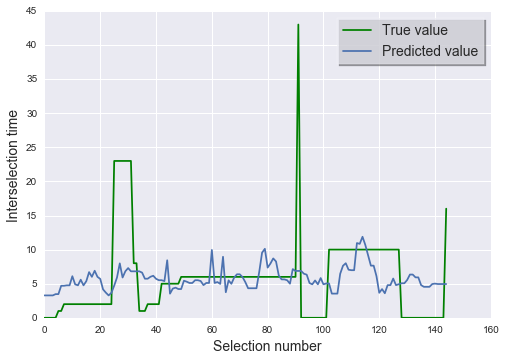

In [25]:
# Plot predicted and true interarrival times on the training set

plt.plot(train_labels, color="green", label="True value")
plt.plot(model.predict(train_features), label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [26]:
# Print mean squared error and R^2 on the test set
print(numpy.mean((model.predict(test_features) - test_labels) ** 2))
print(model.score(test_features, test_labels))

50.564517194
0.0260237677732


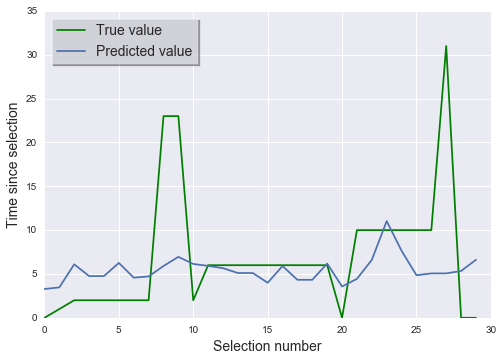

In [27]:
# Plot predicted and true time since selection on the test set 

plt.plot(test_labels, color="green", label="True value")
plt.plot(model.predict(test_features), label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Time since selection", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

### Model performance with restricted features

In [28]:
# Restrict the features to just Airhead and Kitkat - the two most influential features

train_features_res = [[e[0], e[2]] for e in train_features]
train_labels_res = train_labels
test_features_res = [[e[0], e[2]] for e in test_features]
test_labels_res = test_labels
model_res = linear_model.LinearRegression()
model_res.fit(train_features_res, train_labels_res)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

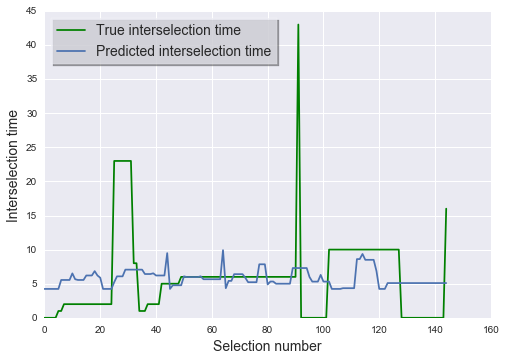

In [29]:
# Plot predicted and true interarrival times on the training set

plt.plot(train_labels_res, color="green", label="True interselection time")
plt.plot(model_res.predict(train_features_res), label="Predicted interselection time")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [30]:
# Print the mean squared error and R^2 of the restricted model on the training set

print(numpy.mean((model_res.predict(train_features_res) - train_labels_res) ** 2))
print(model_res.score(train_features_res, train_labels_res))

36.6121458529
0.0388011066363


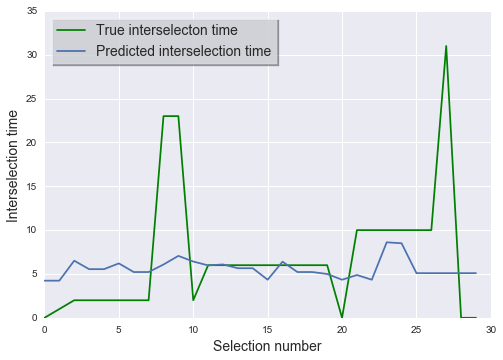

In [31]:
# Plot predicted and true interarrival times on the test set

plt.plot(test_labels_res, color="green", label="True interselecton time")
plt.plot(model_res.predict(test_features_res), label="Predicted interselection time")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [32]:
# Print the mean squared error and R^2 of the restricted model on the test set

print(numpy.mean((model_res.predict(test_features_res) - test_labels_res) ** 2))
print(model_res.score(test_features_res, test_labels_res))

51.0043482151
0.0175517208797
